# Enginnering Math Team Project_1

# Part 1. Matlab symbolic toolbox

<img src="Screen%20Shot%202019-06-21%20at%2011.25.35%20AM.png">

The limit value of the function is 1 as t approaches 0.
The limit value of the function is 0 as t approaches positive infinity.
The limit value of the function is 0 as t approaches negative infinity.


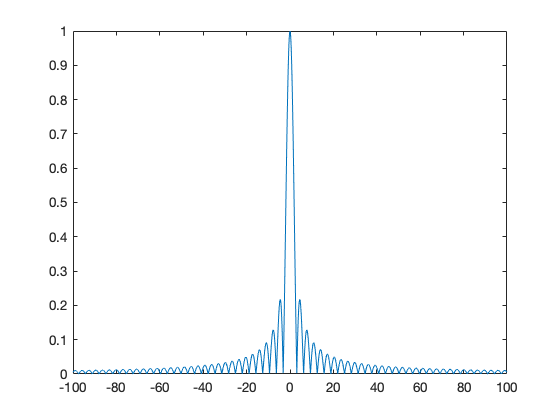

In [1]:
% Script Name : sinx(.m)
    % author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % 1). Plot abs(sin(x)/x) 
    % 2). Compute limit values of the function at various points

% Basic settings
% Clear workspace, output window and close all the figures.
clear all; close all; clc; 

% Create a numbered figure and set the position property
fig = figure(1);
fig.Position = [ 0 0 600 400 ];     % [left bottom width height]

% Make an array x with points 
% and produce f which is an array of results of the given function
x = -100:.05:100;
f = abs(sin(x)./x);     % element-wise operation

% Map the x, f(x) and display the graph in the figure window
plot(x, f)

% Save the plot as sinc.png
saveas(gcf, 'sinc.png')


% Answers to the questions
% 1a) The value of f(0) does not actually exist,
%     but it seems to be 1.
% 1b) f(0) cannot have a real number as a value since f(0) has 0 
%     as a numerator. The abcense of the value at x=0 illustrates
%     that MATLAB does not draw undefinable values when plotting.
% 2) The value seems to be 0.


% Define above function one more time with a symbolic variable t
syms t;
f = abs(sin(t)/t);

% Calculate limit values as t approaches 0, +infinity, -infinity
a = limit(f, 0);
b = limit(f, inf);
c = limit(f, -inf);

% Print out results and explanation.
fprintf('The limit value of the function is %d as t approaches 0.\n', a);
fprintf('The limit value of the function is %d as t approaches positive infinity.\n', b);
fprintf('The limit value of the function is %d as t approaches negative infinity.\n', c);

# Part 2. Scripting the plots

<img src = "Screen%20Shot%202019-06-21%20at%2011.26.29%20AM.png">

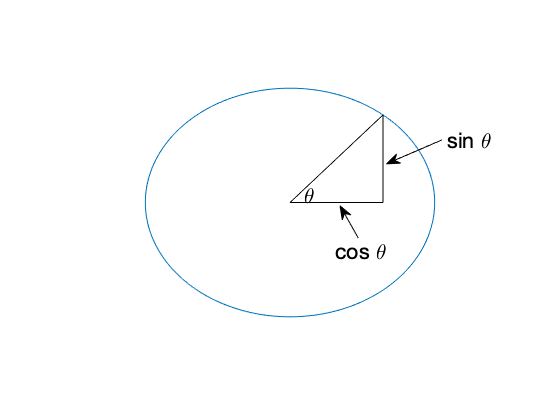

In [4]:
% Script_name : circleFigure(.m)
    % author : 
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
    
% < Explantion for the script >
    % Part 1). Plot radius-10 circle and 50-degree right-angle triangle.
    % Part 2). Annotate the angle with greek letter theta, sin theta, cos theta.
    % Part 3). Save the completed figure in jpeg.


% Basic settings
% Clear workspace, output window and close all the figures.
clear all; close all; clc; 
% Make a figure and set the figure palette size. 
fig = figure(2);
fig.Position = [470, 200, 500, 500];



% Part 1)
% Plot a circle shape  (using 2 functions(x(t), y(t) / center at (0,0)).
syms t x y ;
x = 10 * cos(t); 
y = 10 * sin(t);
fplot(x,y,[0 2*pi]) 



% p.s) Widen figure palette for later annotations
axis([-15 15 -15 15]);


% (a) Draw a 50 degree diagonal line 
% ( chosen fplot only for this to relative weak color intensity to higlight following 2 annotations )
hold on
syms z w;
w = tand(50) * z;
fplot(w, [0, 10*cosd(50)], 'k');

% (b) Draw a vertical line
hold on
b = 0 :0.01:10*sind(50);
a = (10*cosd(50)) * ones(size(b));
plot(a, b, 'k');

% (c). Draw a horizental line (triangle complete)
hold on
c = 0 :0.01:10*cosd(50);
d = zeros(size(c));
plot(c, d, 'k');



% Part 2)

% (a). annotate the angle
text(1.0, 0.65, '\theta','FontSize',16);

% (b). annotate sin and cos theta with annotation-textarrow.
% * normallized ranged input is required for annotation_textarrow
% (*the input value was produced by opensource function 'y_to_norm_v2.m' written by girish ratanpal )

% annotate cos theta with text arrow
axis_x = [0.6398, 0.6072]; % normallized x range for cos theta textarrow line input
axis_y = [0.4333, 0.5100]; % normallized y range for cos theta textarrow line input
a = annotation('textarrow',axis_x,axis_y,'String', 'cos \theta','FontSize', 16); 

% annotate sin theta with text arrow
axis_x_2 = [0.7892, 0.6900]; % normallized x range for sin arrow line [1->2]
axis_y_2 = [0.6669, 0.6099]; % normallized y range for sin arrow line [1->2]
b = annotation('textarrow',axis_x_2 , axis_y_2, 'String', 'sin \theta','FontSize', 16);



% Part 3)
% make axis invisible / save the fully-annotated figure as jpg file.
set(gca, 'visible', 'off');
saveas(fig,'circle.jpg');

# Part3. Data Plotting

<img src = "Screen%20Shot%202019-06-21%20at%2011.49.21%20AM.png">

In [2]:
%%file fixData.m
function [fixed] = fixData(original)
% Function_name : fixData
% Author        : 2013130874 Han Seok Hee
%               : 2018320177 Hwang Jongho
%               : 2017130776 CHUNG Hyelee
% input  : Matrix with an element more or less than 0 ( size 206 by 14 )
% output : Matrix in which the row including false data is replaced to NaN
% What the function does : Presumed condition is that every element should be bigger or equal to 0.
%                    It cleans the data to fulfill the presumed condition. 
%                    Statistical range should be decided, outliers should be
%                    checked and deleted.
    

% copys data
fixed = original;

% sets upper boundaries for values that affect means
% (as in the data's negative value -1.0*e+09)
upperbound = 100000; % should be checked and modified in other datas

fixed(~isfinite(fixed)) = NaN;  % if not finite value, puts NaN instead
fixed(fixed < 0) = NaN;         % if not finite value, puts NaN instead
fixed(fixed > upperbound) = NaN;    % if outranged, puts NaN instead

% logical 206x14 matrix inlier
% finds if a single data is valid due to others. if yes: logical 1. no: 0
isinlier = ((abs(fixed-nanmean(fixed)) <= 2*nanstd(fixed)));

% outliers are replaced to NaN
fixed(isinlier == 0) = NaN;
% THIS LINE COULD BE DELETED IF WE CAN TRUST ALL VALUES IN DATA
% For example, if the data is counted or mathematically correct, we should
% put them in the plot, but in this case we do not know where the values
% come from so it could (and probably) have minor errors.

% [ Why did we fix it that way ] :
%  [replace erroneous element <less than zero> with NaN]
%   That particular (a,b)th element might have been measured wrong,
%   probably because of bad measurment tool being broken or a mistake of a staff, 
%   but still the other elements of that row at the other columns still can be valid. 
%  [replace erroneous element outranged, with NaN]
%   Also statistically outranged values are eliminated because they are
%   probably invalid datas, strange to others. And these could affect the
%   means calculating outliers.
%   * However, We strongly agree this is far-fetched for this problem set's
%   requirement. We devised it just for our future data programming
%   experience, in which extremely big values should be excluded in often
%   case.

%  [replace outliers with NaN *]
%   We replaced outliers with NaN under the presumption that this is higly likely to
%   be data from some scientific experiment. The experiment is highly erroneous and 
%   2 sigma will be able to exclude all those possible anomalies.
%   * However, We also firmly agree that these maybe the type of data that could be
%   relatively precisely measured like height, money etc.
%   In those case we agree that we won't let our datas go through this
%   outlier filering procedure as data could well represent the reality and any loss of
%   such datas could get us far from analyzing the correlation properly.


end



Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_1/fixData.m'.


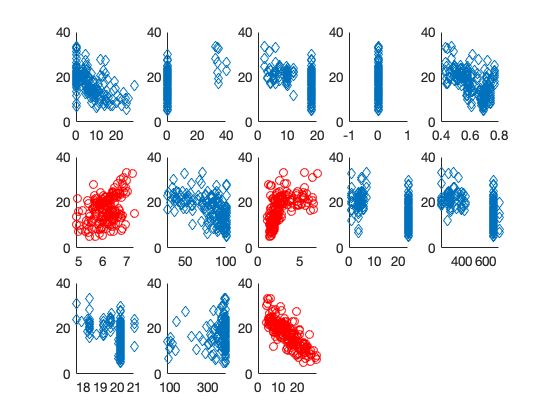

In [5]:
% Script Name : processData(.m)
    % author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % Load data, fix them and show valid information into plots


clear all;       % clears the workspace
close all;       % closes figures
clc;             % clears the command window

% Load data from dataForTesting.mat and store it
load('dataForTesting.mat');

% Problem detecting and fixing 'data' and puts in 'fdata'
fdata = fixData(data);

% Figure for exploratory scatter plot
figure(3);
set(3, 'position', [50 0 1000 1000]);



for i = 1:13 % Column 1~13
   
    % logical Matrix that shows valid data to show in plot
    % if 'i'th or 14th value is NotANum, validData's element = logical 0
    % else logical 1
    validData = ~(isnan(fdata(:,i))+isnan(fdata(:,14)));
   
      
    % sets three colors red, else default
    if (i== 6 || i==8 || i==13)
        color = 'r';
    else
        color = 'd';
    end
   
    % plots 3x5 scatters of fdata's valid pairs
    subplot(3, 5, i);
  
    scatter(fdata(validData,i), fdata(validData,14), color);
    
    % [ Why did we choose these 3 numbers ] :
    % First of all, 13th column shows the clearest negative correlation to 14th column,
    % showing decent inclination. Also, the data points are most densely
    % and consistently formed around the trend line(if we draw one). That's why
    % We chose this candidate column despite its relatively small value
    % inclination. The Points far from line barely exists. Therefore we propose that
    % 13th column data is the most explanatory power determining 14th
    % column, as we think this could be the most 'responsible' one.
    %
    % Secondly, We concluded that the 8th column has the second most explanatory power.
    % It has positive correlation with 14th column. 
    % Though there are many points that are scattered far away from the 
    % trend line, the line has relatively higher slope than other columns
    % do. Also, data points in the left-hand part of the graph are quite
    % dense.
    %
    % Lastly, the 6th column datas shows relatively consistent positive correlation with
    % 14th elements and has similar variance or density around a trendline
    % to that of 1st column's correlation with 14th elemnet. However, it has
    % higher value of inclination though it is lower than 8th, which means the value of 14th element is more
    % strongly influenced by change in 6th column value than 1st column
    % value. 
    
end